**BASIC MNIST EXAMPLE WITH MLP**

Imports...

In [1]:
from __future__ import print_function

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.datasets import mnist
from tensorflow.keras.layers import BatchNormalization as BN
from keras.layers import GaussianNoise as GN
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Conv2D, MaxPooling2D, Flatten, Dropout, Input, Reshape
from tensorflow.keras.optimizers import SGD
from tensorflow.keras import utils
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import LearningRateScheduler as LRS
from keras.preprocessing.image import ImageDataGenerator


Init Plugin
Init Graph Optimizer
Init Kernel


Define batch size, number of epochs and number of classes

In [2]:
batch_size = 100
epochs = 75
num_classes=10

Load MNIST and transform



In [3]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

print('training set', x_train.shape)
print('test set', x_test.shape)

x_train = x_train.reshape(60000, 28,28,1)
x_test = x_test.reshape(10000, 28,28,1)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

# Normalize [0..255]-->[0..1]
x_train /= 255
x_test /= 255

# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

training set (60000, 28, 28)
test set (10000, 28, 28)


Define the NN topology, a sequential model with 2 hidden layers

In [4]:
model = Sequential()
model.add(Reshape(target_shape=(784,), input_shape=(28,28,1)))
model.add(GN(0.3))

model.add(Dense(1024))
model.add(BN())
model.add(GN(0.3))
model.add(Activation('relu'))

model.add(Dense(1024))
model.add(BN())
model.add(GN(0.3))
model.add(Activation('relu'))

model.add(Dense(1024))
model.add(BN())
model.add(GN(0.3))
model.add(Activation('relu'))

model.add(Dense(num_classes, activation='softmax'))

model.summary()


Metal device set to: Apple M1
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
reshape (Reshape)            (None, 784)               0         
_________________________________________________________________
module_wrapper (ModuleWrappe (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 1024)              803840    
_________________________________________________________________
batch_normalization (BatchNo (None, 1024)              4096      
_________________________________________________________________
module_wrapper_1 (ModuleWrap (None, 1024)              0         
_________________________________________________________________
activation (Activation)      (None, 1024)              0         
_________________________________________________________________
dense_1 (Dense)           

2022-01-21 17:39:36.245297: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2022-01-21 17:39:36.245566: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


Define an optimizer 

In [5]:
sgd=SGD(learning_rate=0.01, decay=1e-6, momentum=0.9)

Compile the model, define loss and link the optimizer

In [6]:
model.compile(loss='categorical_crossentropy',
              optimizer=sgd,
              metrics=['accuracy'])

Finally, train the model and evaluate over the test data

In [7]:
datagen = ImageDataGenerator(
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=False
)

def scheduler(epoch):
    if epoch < 25:
        return .1
    elif epoch < 50:
        return 0.01
    else:
        return 0.001

history = model.fit(
    datagen.flow(x_train, y_train,batch_size=batch_size),             
    epochs=epochs,
    verbose=1,
    validation_data=(x_test, y_test),
    callbacks=[LRS(scheduler)]
)

# Evaluate over test
score = model.evaluate(x_test, y_test, verbose=0)

print('Test loss:', score[0])
print('Test accuracy:', score[1])
print(f"Test error: {((1-score[1]) * 100):.3f}%")

2022-01-21 17:39:36.960631: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:176] None of the MLIR Optimization Passes are enabled (registered 2)
2022-01-21 17:39:36.961884: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


Epoch 1/75


2022-01-21 17:39:37.172068: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


598/600 [============================>.] - ETA: 0s - loss: 0.7268 - accuracy: 0.8028

2022-01-21 17:39:48.557334: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


600/600 [==============================] - 13s 21ms/step - loss: 0.7259 - accuracy: 0.8031 - val_loss: 0.1765 - val_accuracy: 0.9476
Epoch 2/75
600/600 [==============================] - 13s 21ms/step - loss: 0.3375 - accuracy: 0.8966 - val_loss: 0.1039 - val_accuracy: 0.9687
Epoch 3/75
600/600 [==============================] - 13s 21ms/step - loss: 0.2676 - accuracy: 0.9159 - val_loss: 0.0805 - val_accuracy: 0.9726
Epoch 4/75
600/600 [==============================] - 13s 22ms/step - loss: 0.2321 - accuracy: 0.9275 - val_loss: 0.0724 - val_accuracy: 0.9760
Epoch 5/75
600/600 [==============================] - 13s 22ms/step - loss: 0.2140 - accuracy: 0.9324 - val_loss: 0.0714 - val_accuracy: 0.9768
Epoch 6/75
600/600 [==============================] - 13s 22ms/step - loss: 0.1952 - accuracy: 0.9393 - val_loss: 0.0552 - val_accuracy: 0.9823
Epoch 7/75
600/600 [==============================] - 13s 21ms/step - loss: 0.1852 - accuracy: 0.9407 - val_loss: 0.0473 - val_accuracy: 0.9839
Epo

600/600 [==============================] - 13s 21ms/step - loss: 0.0744 - accuracy: 0.9766 - val_loss: 0.0233 - val_accuracy: 0.9920
Epoch 58/75
600/600 [==============================] - 13s 21ms/step - loss: 0.0755 - accuracy: 0.9751 - val_loss: 0.0235 - val_accuracy: 0.9919
Epoch 59/75
600/600 [==============================] - 13s 21ms/step - loss: 0.0738 - accuracy: 0.9757 - val_loss: 0.0232 - val_accuracy: 0.9920
Epoch 60/75
600/600 [==============================] - 13s 21ms/step - loss: 0.0746 - accuracy: 0.9758 - val_loss: 0.0232 - val_accuracy: 0.9921
Epoch 61/75
600/600 [==============================] - 13s 22ms/step - loss: 0.0736 - accuracy: 0.9762 - val_loss: 0.0234 - val_accuracy: 0.9920
Epoch 62/75
600/600 [==============================] - 16s 26ms/step - loss: 0.0737 - accuracy: 0.9762 - val_loss: 0.0231 - val_accuracy: 0.9921
Epoch 63/75
600/600 [==============================] - 14s 24ms/step - loss: 0.0746 - accuracy: 0.9759 - val_loss: 0.0230 - val_accuracy: 0.99

In [8]:
import matplotlib.pyplot as plt

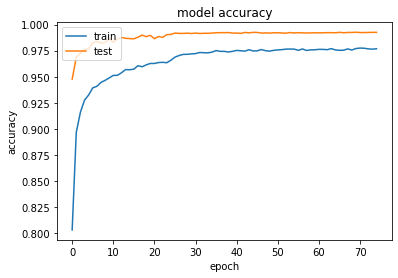

In [9]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()